# **Project Name**    - Uber Supply And Demand Gap Analysis 



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - Aswathy Gopalakrishnan


# **Project Summary -**

This project analyzes Uber trip data to understand when there are more ride requests than available drivers. By examining trips statuses, driver availabilities, and time segments throughout the day, the project aims to identify times and areas with supply and demand gaps. The goal is to find patterns and help provide suggestion to improve driver availability during busy times.  The initial data preprocessing is already done in SQL. Basic data analysis was then done in Excel and the dashboards are created to understand the data, and identify the supply-demand gap. Here, in the notebook file, detailed temporal analysis will be done to identify the peak time for requests and the availability of drivers during the same time frame.



# **GitHub Link -**

https://github.com/aswathy2410

# **Problem Statement**


 This project aims to analyze uber trip data to identify when and where the supply-demand gaps occur , and to understand the underlying reasons behind them, with the goal of improving driver deployment and service efficiency.

#### **Define Your Business Objective?**

The business objective is to analyze ride request and driver availability data in order to identify times and locations with supply-demand gaps, enabling better driver scheduling and operational decisions to improve service quality and reduce rider wait times.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [246]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Dataset Loading

In [247]:
# Load Dataset
df = pd.read_csv('Uber_Request_Data_Cleaned.csv')


### Dataset First View

In [248]:
# Dataset First Look
df.head()

,Request id,Pickup point,Driver id,Status,request_time,drop_time,response_time,request_date,request_time_hhmm,drop_date,drop_time_hhmm
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,69,2016-11-07,11:51,2016-11-07,13:00
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,50,2016-11-07,17:57,2016-11-07,18:47
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,41,2016-12-07,09:17,2016-12-07,09:58
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,55,2016-12-07,21:08,2016-12-07,22:03
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52,2016-07-13,08:33,2016-07-13,09:25


In [249]:
print(df[['request_time_hhmm', 'drop_time_hhmm']].head())

  request_time_hhmm drop_time_hhmm
0             11:51          13:00
1             17:57          18:47
2             09:17          09:58
3             21:08          22:03
4             08:33          09:25


### Dataset Rows & Columns count

In [250]:
# Dataset Rows & Columns count
# Number of rows
rows = df.shape[0]

# Number of columns
columns = df.shape[1]

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 6745
Number of columns: 11


### Dataset Information

In [251]:
# Convert date columns to proper datetime formats
df['request_time'] = pd.to_datetime(df['request_time'], errors='coerce')
df['drop_time'] = pd.to_datetime(df['drop_time'], errors='coerce')
df['request_date'] = pd.to_datetime(df['request_date'], errors='coerce')
df['drop_date'] = pd.to_datetime(df['drop_date'], errors='coerce')
df['request_time_hhmm'] = pd.to_datetime(df['request_time_hhmm'], format='%H:%M', errors='coerce').dt.time
df['drop_time_hhmm'] = pd.to_datetime(df['drop_time_hhmm'], format='%H:%M', errors='coerce').dt.time


# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          6745 non-null   int64         
 3   Status             6745 non-null   object        
 4   request_time       6745 non-null   datetime64[ns]
 5   drop_time          2831 non-null   datetime64[ns]
 6   response_time      6745 non-null   int64         
 7   request_date       6745 non-null   datetime64[ns]
 8   request_time_hhmm  6745 non-null   object        
 9   drop_date          2831 non-null   datetime64[ns]
 10  drop_time_hhmm     2831 non-null   object        
dtypes: datetime64[ns](4), int64(3), object(4)
memory usage: 579.8+ KB


In [252]:
df.head()

,Request id,Pickup point,Driver id,Status,request_time,drop_time,response_time,request_date,request_time_hhmm,drop_date,drop_time_hhmm
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,69,2016-11-07,11:51:00,2016-11-07,13:00:00
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,50,2016-11-07,17:57:00,2016-11-07,18:47:00
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,41,2016-12-07,09:17:00,2016-12-07,09:58:00
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,55,2016-12-07,21:08:00,2016-12-07,22:03:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52,2016-07-13,08:33:00,2016-07-13,09:25:00


### What did you know about your dataset?

There are 6745 rows with 11 columns of data. As missing values, duplicate values,and data discrepancies were already verified in the SQL analysis stage, these were not performed here. The date columns are properly formatted to her with temporal analysis. Even understanding of the data and data wrangling has been performed in Excel and SQL respectively. Hence, these steps are skipped here.

## ***2. Understanding Your Variables***

In [253]:
# Dataset Columns
print(df.columns)

Index(['Request id', 'Pickup point', 'Driver id', 'Status', 'request_time',
       'drop_time', 'response_time', 'request_date', 'request_time_hhmm',
       'drop_date', 'drop_time_hhmm'],
      dtype='object')


In [254]:
# Dataset Describe
df.describe()

,Request id,Driver id,request_time,drop_time,response_time,request_date,drop_date
count,6745.000000,6745.000000,6745,2831,6745.000000,6745,2831
mean,3384.644922,90.764715,2016-09-04 01:58:32.990956288,2016-09-05 12:23:10.416460544,21.875315,2016-09-03 12:31:16.590066432,2016-09-04 23:00:29.247615744
min,1.000000,0.000000,2016-07-12 23:11:00,2016-07-13 00:01:12,0.000000,2016-07-12 00:00:00,2016-07-13 00:00:00
25%,1691.000000,0.000000,2016-07-14 07:29:14,2016-07-14 08:10:24.500000,0.000000,2016-07-14 00:00:00,2016-07-14 00:00:00
50%,3387.000000,53.000000,2016-07-15 13:25:52,2016-07-15 15:27:41,0.000000,2016-07-15 00:00:00,2016-07-15 00:00:00
75%,5080.000000,177.000000,2016-11-07 18:50:00,2016-11-07 19:25:30,48.000000,2016-11-07 00:00:00,2016-11-07 00:00:00
max,6766.000000,300.000000,2016-12-07 23:53:00,2016-12-07 23:45:00,83.000000,2016-12-07 00:00:00,2016-12-07 00:00:00
std,1955.099667,99.132418,NaN,NaN,27.244064,NaN,NaN


### Variables Description

Request ID is the unique identifier here. Driver Id ranges from1 to 300, and the cancelled ones are marked as 0. request_time, rqeuest_date and request_hh_mm gives the timing descriptions of the time of request. Meanwhile, drop_time, drop_date, drop_hh_mm gives the time of dropping the customer. Status lets us know whether a trip completed, cancelled, or didn't find a ride at all.

### Check Unique Values for each variable.

In [255]:
# Check Unique Values for each variable.
for column in df.columns:
    print(f"Column: {column} has {df[column].nunique()} unique values.")

Column: Request id has 6745 unique values.
Column: Pickup point has 2 unique values.
Column: Driver id has 301 unique values.
Column: Status has 3 unique values.
Column: request_time has 5622 unique values.
Column: drop_time has 2600 unique values.
Column: response_time has 65 unique values.
Column: request_date has 6 unique values.
Column: request_time_hhmm has 1351 unique values.
Column: drop_date has 7 unique values.
Column: drop_time_hhmm has 1150 unique values.


## 3. ***Data Wrangling***

### Data Wrangling Code

As the cleaning, dataset correction and preprocessing is already done beforem some feature engineering is performed in this step to create a new column 'time_of_day_segment'. As the name suggests, it indicates the time of the day based on the request hour - Early morning, morning, noon, evening, night, and late night.

In [256]:
# Define a function to categorize time of day
def categorize_time_of_day(time_obj):
    if pd.isnull(time_obj):
        return 'Unknown'
    # Extract hour
    hour = time_obj.hour
    # Classify based on hour with updated categories
    if 0 <= hour < 3:
        return 'Late Night'
    elif 3 <= hour < 7:
        return 'Early Morning'
    elif 7 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 15:
        return 'Afternoon'
    elif 15 <= hour < 19:
        return 'Evening'
    elif 19 <= hour < 22:
        return 'Night'
    elif 22 <= hour < 24:
        return 'Late Night'
    else:
        return 'Unknown'

# Apply the function to your 'request_time_hhmm' column
df['time_of_day_segment'] = df['request_time_hhmm'].apply(categorize_time_of_day)

# Check the resulting DataFrame
print(df[['request_time_hhmm', 'time_of_day_segment']])


     request_time_hhmm time_of_day_segment
0             11:51:00             Morning
1             17:57:00             Evening
2             09:17:00             Morning
3             21:08:00               Night
4             08:33:00             Morning
...                ...                 ...
6740          23:49:00          Late Night
6741          23:50:00          Late Night
6742          23:52:00          Late Night
6743          23:54:00          Late Night
6744          23:55:00          Late Night

[6745 rows x 2 columns]


### What all manipulations have you done and insights you found?

In SQL, datatypes have been corrected, missing values were handled, and additional columns have been created by splitting date and time for easily analysis and visalizations. Here, in python, an additional column has been created to get the time of the day. Also, the date datatypes were not picked up properly while dataloading. These were also corrected.

## ***2. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Total Demand by Time of Day Segment

C:\Users\USER\AppData\Local\Temp\ipykernel_3032\2022334680.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




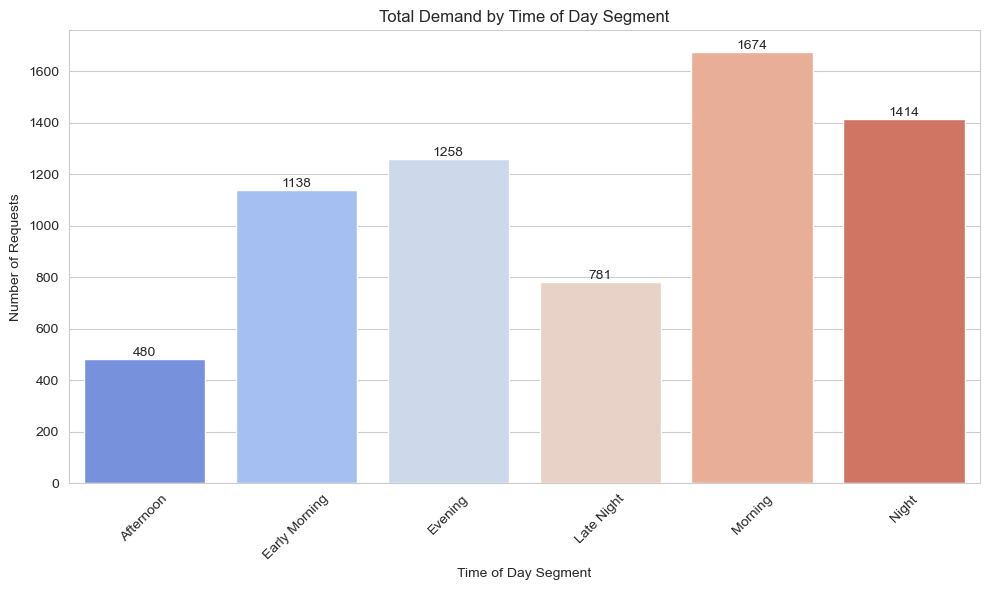

In [257]:
# Chart 1 - Total Demand by Time of Day Segment

# Calculate the demand based on request date and time segment
demand = df.groupby(['request_date', 'time_of_day_segment']).size().reset_index(name='request_count')

# Aggregate total requests by time_of_day_segment
segment_demand = demand.groupby('time_of_day_segment')['request_count'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='time_of_day_segment', y='request_count', data=segment_demand, palette='coolwarm')

plt.title('Total Demand by Time of Day Segment')
plt.xlabel('Time of Day Segment')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()

# Loop over all collections of bars and add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()



##### 1. Why did you pick the specific chart?

The visualization shows how the requests are spread across different time segments along a day. It will help to understand the segments where demand is really high as well as low. By identifying this, more or less resources can be allocated based on the demand during those segments.

##### 2. What is/are the insight(s) found from the chart?

The highest demands are during ‘Morning’ and ‘Night’ segments with 1674 and 1414 total requests respectively. The lowest demand is in the ‘Afternoon’ time segment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

More resources can be shifted to morning and night rides, and some resources can be spared during the afternoon. There may be reasons why the drivers choose specific timeslots. Driver's availability and location preference must be considered before making the choices.

#### Number of Requests per Day by Time Segment

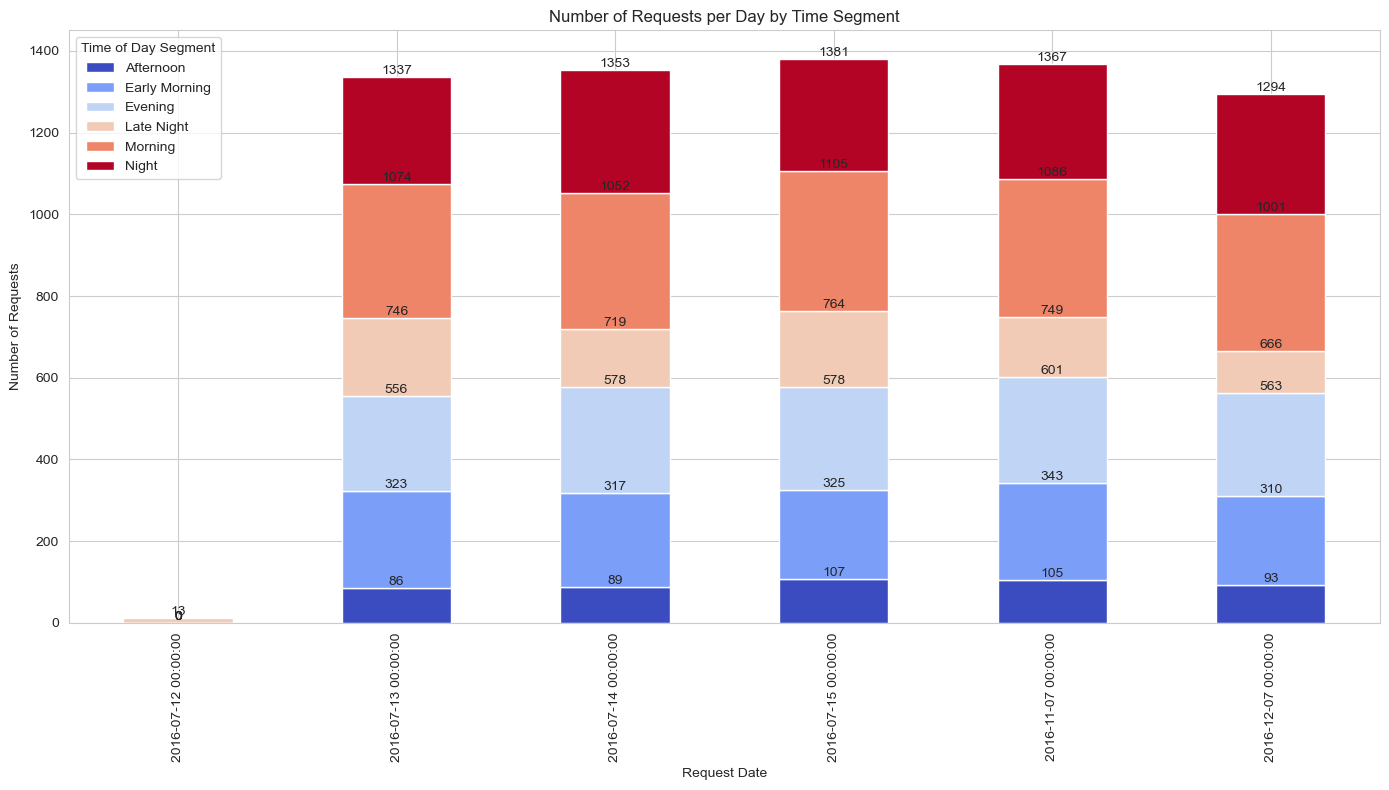

In [258]:
# Chart 2 - Number of Requests per Day by Time Segment

# Group by request_date and time_of_day_segment, count requests
daily_demand = df.groupby(['request_date', 'time_of_day_segment']).size().reset_index(name='request_count')

# Pivot to get each segment as a column, indexed by date
pivot_df = daily_demand.pivot(index='request_date', columns='time_of_day_segment', values='request_count')

# Fill missing values, NaNs with 0 for plotting
pivot_df.fillna(0, inplace=True)

ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14,8), colormap='coolwarm')

plt.title('Number of Requests per Day by Time Segment')
plt.xlabel('Request Date')
plt.ylabel('Number of Requests')
plt.legend(title='Time of Day Segment')
plt.tight_layout()

# Add labels to all bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()


##### 1. Why did you pick the specific chart?

The total number of requests on distinct request dates were analysed based on the time segments. This helps to identify if the trends we identified earlier are consistent over the days. 

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the pattern is fairly similar with more requests in the morning and night segments and the lowest in the afternoon on all days, reaffirming whatever we have observed earlier.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This confirms that the proper allocation of resources must be done on a daily basis to reduce the demand-supply gap.

#### Requests by Status and Time Segment

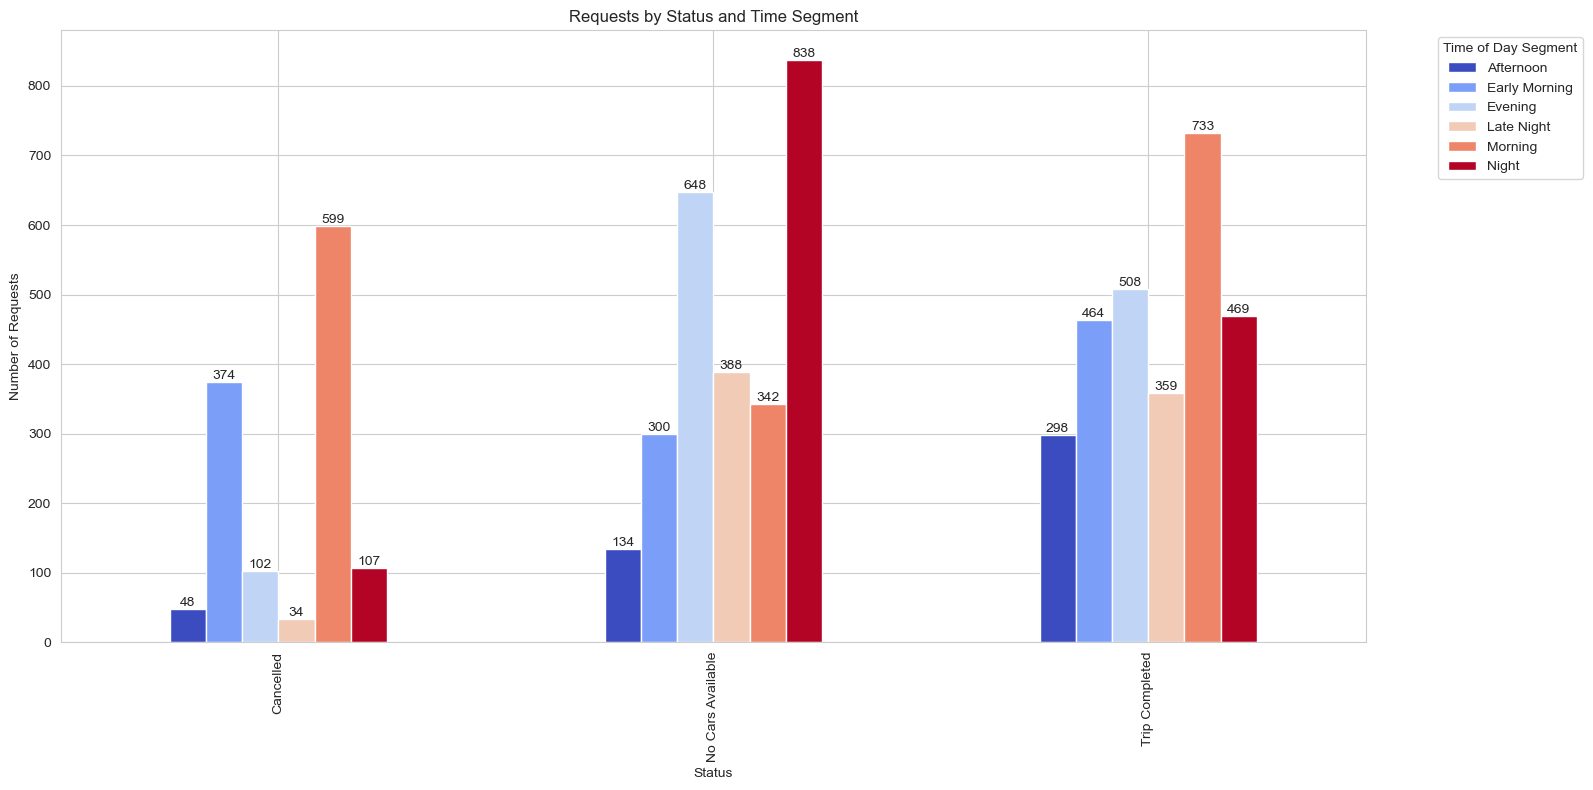

In [259]:
# Chart 3- Requests by Status and Time Segment
# Grouped by status and time segment
grouped = df.groupby(['Status', 'time_of_day_segment']).size().reset_index(name='request_count')

# Pivot data for clustered bars
pivot_df = grouped.pivot(index='Status', columns='time_of_day_segment', values='request_count').fillna(0)

# Plot as clustered (side-by-side) bar chart
ax = pivot_df.plot(kind='bar', figsize=(16,8),colormap='coolwarm')
plt.title('Requests by Status and Time Segment')
plt.xlabel('Status')
plt.ylabel('Number of Requests')
plt.legend(title='Time of Day Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.show()

##### 1. Why did you pick the specific chart?

Now that the time segments with high and low demands have been identified, the analysis is done to understand the primary reasons for demand-supply gap occurring in these segments. This visualization helps to understand that. 

##### 2. What is/are the insight(s) found from the chart?

It is observed that, the gap occurs during night mostly because no cars are available during the segment. However, morning rides are mostly cancelled. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Driver's preferences play a major role in this as we had discussed earlier. Not many drivers are interested in taking night rides. In the morning, due to the high demand, the drivers may have more options to choose from based on the location and the estimated charge of the trip. We had observed earlier that cancellations are less in airport. This could be cos of the higher fare. When given an option, drivers would choose the higher one. Some system must be employed to reduce cancellations. However, to limit this won't be a fair change considering the driver's preferences though.

#### Pick-up Locations by Time Segment

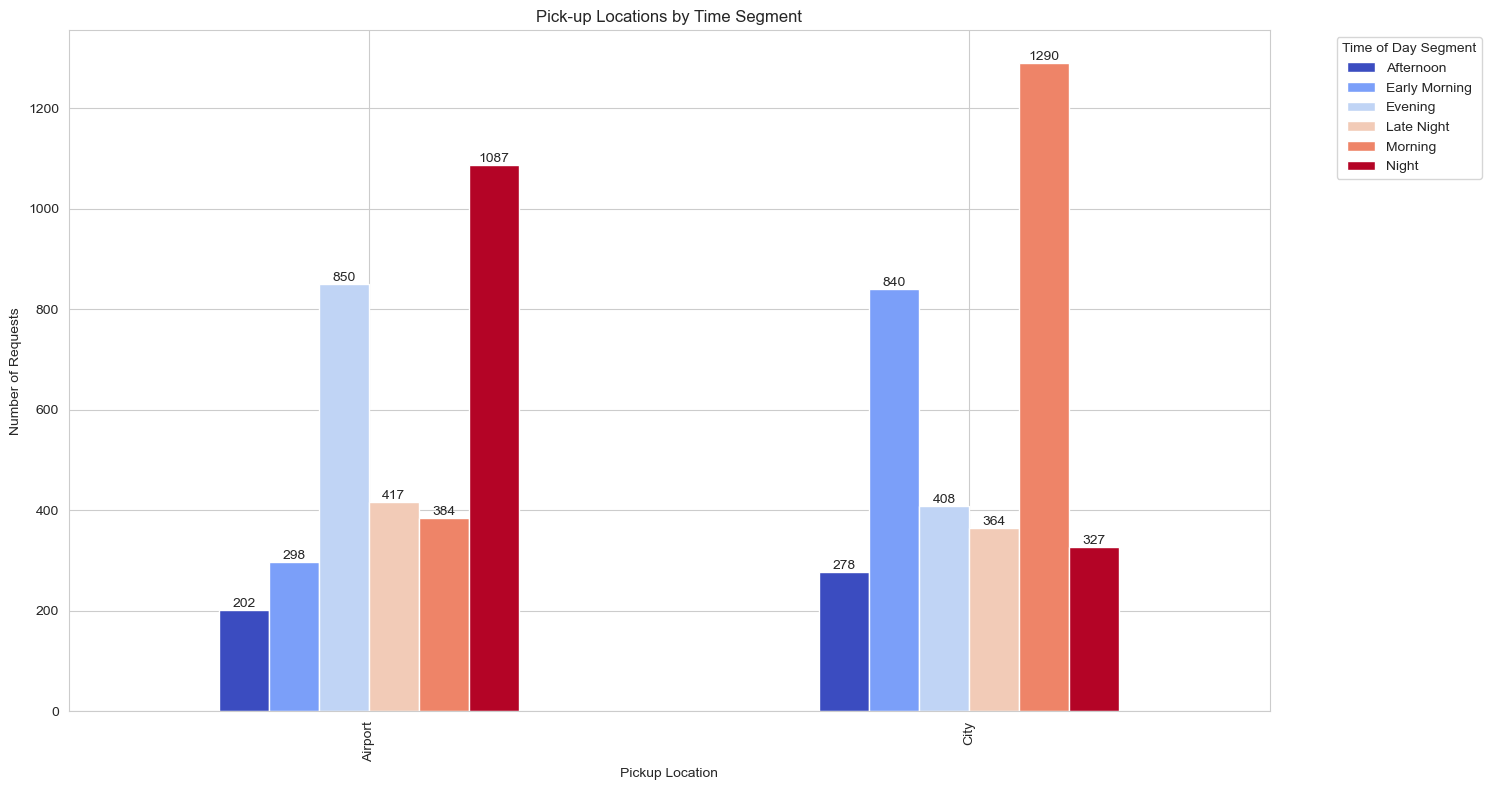

In [260]:
# Chart 4 - Pick-up Locations by Time Segment

# Count total requests per pickup location
pickup_counts = df['Pickup point'].value_counts().reset_index()
pickup_counts.columns = ['Pickup Point', 'Request Count']

# Group by pickup point and time segment
location_time_group = df.groupby(['Pickup point', 'time_of_day_segment']).size().reset_index(name='Request Count')

pivot_location = location_time_group.pivot(index='Pickup point', columns='time_of_day_segment', values='Request Count').fillna(0)
ax = pivot_location.plot(kind='bar', figsize=(15,8), colormap='coolwarm')
plt.title('Pick-up Locations by Time Segment')
plt.xlabel('Pickup Location')
plt.ylabel('Number of Requests')
plt.legend(title='Time of Day Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
    
plt.show()

##### 1. Why did you pick the specific chart?

It was already discussed that cancellations happen more in the airport. Further analysis was done here to see how the distribution of demand is in the locations in different time segments.

##### 2. What is/are the insight(s) found from the chart?

It is observed that there is a high demand for airport trips at night compared to city. In previous analysis, we have seen that the supply is less at night. Connecting these two observations, it can be safely said that the less supply is causing more cancellations for airport trips at night. On the other side, city trips have high demand in the morning. There are enough drivers active in the morning. However, they may be choosing the trips that can pay them extra, leading to more cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This indicates that the supply must be increased in the morning, and better allocation practices need to be set up for the morning rides.

#### Trips During the Day by Status and Time Segment

C:\Users\USER\AppData\Local\Temp\ipykernel_3032\2014056491.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



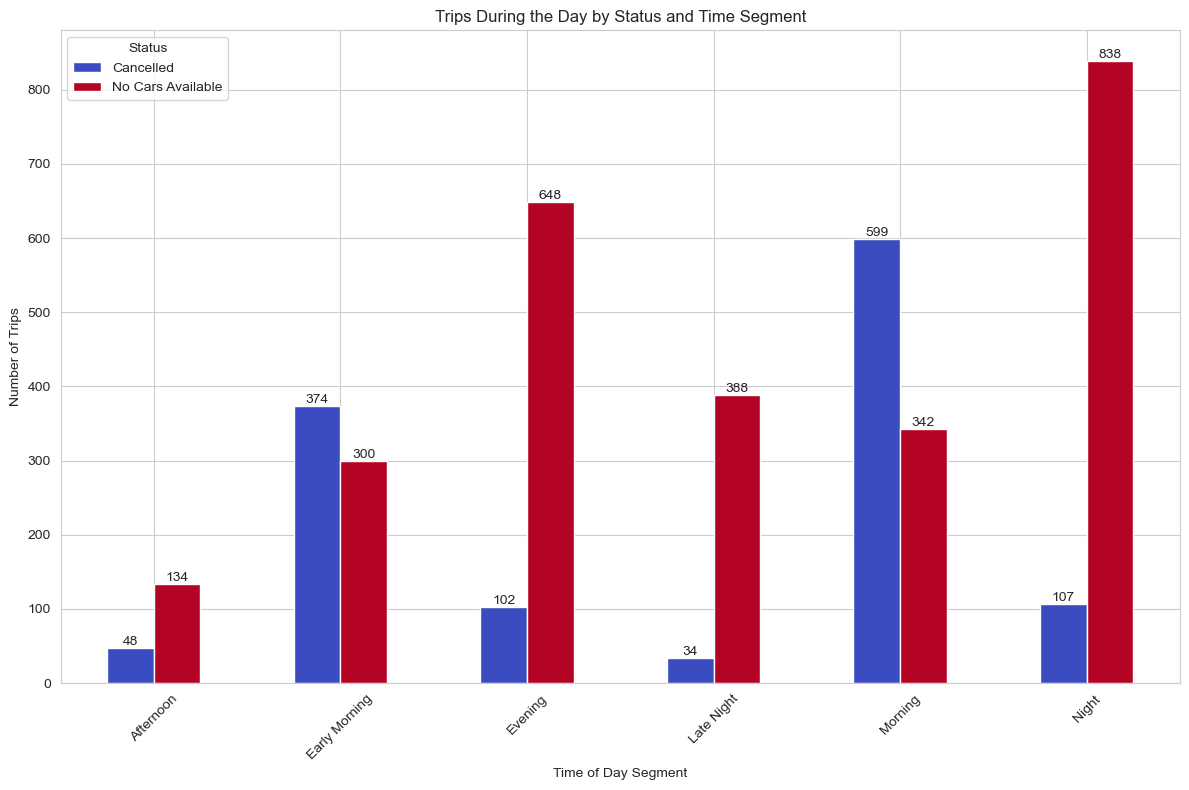

In [261]:
# Chart 5 - Trips During the Day by Status and Time Segment

# Filter for statuses that are reasons for the gap
df_filtered = df[df['Status'].isin(['Cancelled', 'No Cars Available'])]
df_filtered['time_of_day_segment'] = df_filtered['request_time_hhmm'].apply(categorize_time_of_day)

# Count trips per status and time segment
grouped = df_filtered.groupby(['time_of_day_segment', 'Status']).size().reset_index(name='trip_count')

# Pivot for plotting (each status as a separate bar within each time segment)
pivot_df = grouped.pivot(index='time_of_day_segment', columns='Status', values='trip_count').fillna(0)

# Plot as clustered bar chart
ax = pivot_df.plot(kind='bar', figsize=(12, 8),colormap='coolwarm')
plt.title('Trips During the Day by Status and Time Segment')
plt.xlabel('Time of Day Segment')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
    
plt.show()

##### 1. Why did you pick the specific chart?

The visualization helps to identify the reason for gap in specific time segments. This was done to reaffirm the observations to help with better allocation of resources.

##### 2. What is/are the insight(s) found from the chart?

Night has a really high bar for no cars being available. It’s the same for late night and evening travels as well. For early morning and morning rides, cancellations are higher. Afternoons seem to have less demand and less supply too. So we can safely say that, after 12, the demand is much more than supply. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There must be some tactics included for travels after evening to meet the demand. Bonuses, points, or badges that can help the driver improve their profile can be some of the options to this. This way, more drivers will be motivated to work during these time slots.

#### Number of Drivers Available per Day by Time Segment

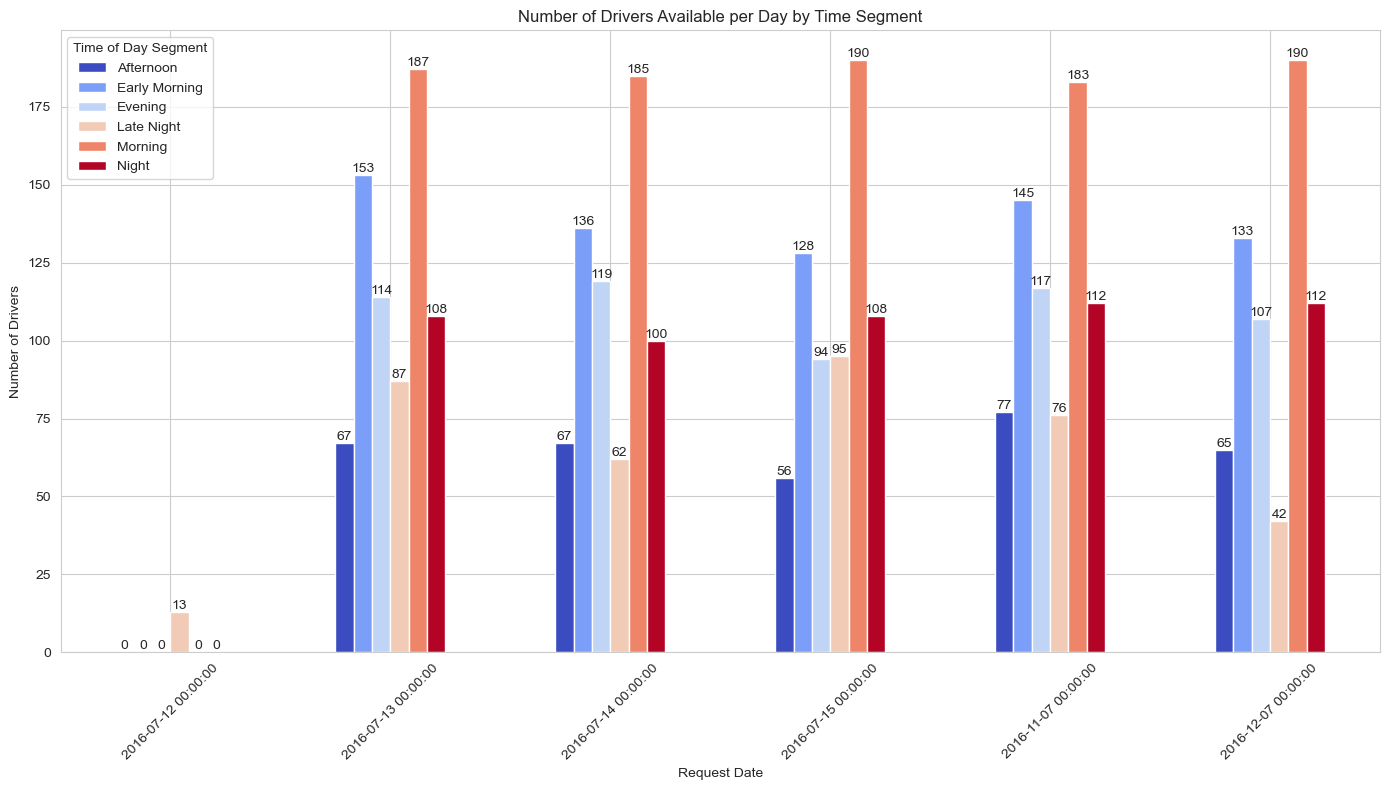

In [262]:
# Chart 6 - Number of Drivers Available per Day by Time Segment

# Filter out driver_id == 0 as they are placement values for NA
df_avail = df[df['Driver id'] != 0]

# Computing supply based on driver ID
supply = df_avail.groupby(['request_date', 'time_of_day_segment'])['Driver id'].nunique().reset_index()
supply.rename(columns={'Driver id': 'driver_count'}, inplace=True)

# Pivot for plotting
pivot_supply = supply.pivot(index='request_date', columns='time_of_day_segment', values='driver_count').fillna(0)

import matplotlib.pyplot as plt
ax = pivot_supply.plot(kind='bar', figsize=(14, 8), colormap='coolwarm')
plt.title('Number of Drivers Available per Day by Time Segment')
plt.xlabel('Request Date')
plt.ylabel('Number of Drivers')
plt.legend(title='Time of Day Segment')
plt.xticks(rotation=45)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
    
plt.show()


##### 1. Why did you pick the specific chart?

The previous analysis clearly showed how the demand is affected based on several features. The following analysis is part of identifying the problems in the supply, how the drivers are distributed across different segments.

##### 2. What is/are the insight(s) found from the chart?

More drivers are available in the morning and early morning segments. There are very few available during night and late-night segments. This clearly defines the gap.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights would help allocate the drivers in a better way.

#### Unique Drivers Active per Time Segment

C:\Users\USER\AppData\Local\Temp\ipykernel_3032\1138436911.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




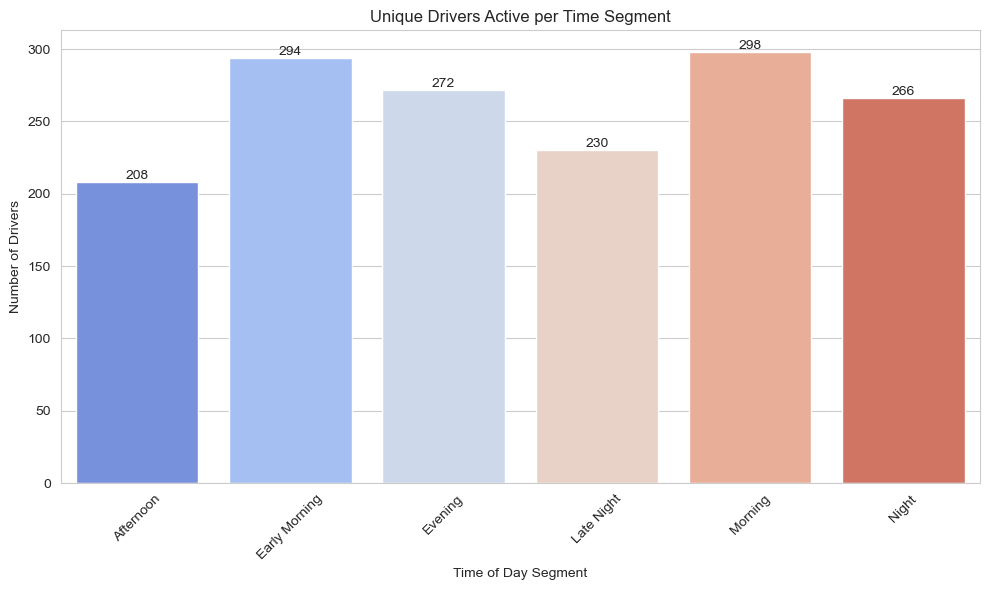

In [263]:
# Chart 7 - Unique Drivers Active per Time Segment

drivers_by_segment = df[df['Driver id'] != 0].groupby('time_of_day_segment')['Driver id'].nunique().reset_index()

# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x='time_of_day_segment', y='Driver id', data=drivers_by_segment, palette='coolwarm')
plt.title('Unique Drivers Active per Time Segment')
plt.xlabel('Time of Day Segment')
plt.ylabel('Number of Drivers')
plt.xticks(rotation=45)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
    
plt.show()

##### 1. Why did you pick the specific chart?

By identifying unique drivers in each segment, it is possible to identify the distribution of the 300 drivers across the day.

##### 2. What is/are the insight(s) found from the chart?

Almost all the drivers are active in the morning (298 out of 300). However, at night, it reduces to 266 and 230 during late night. Drivers prefer to work more in the morning due to high demands and better locations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Drivers prefer to work more during peak request time helping them to get high fares and more number of rides.

#### Requests per Driver across Time Segments

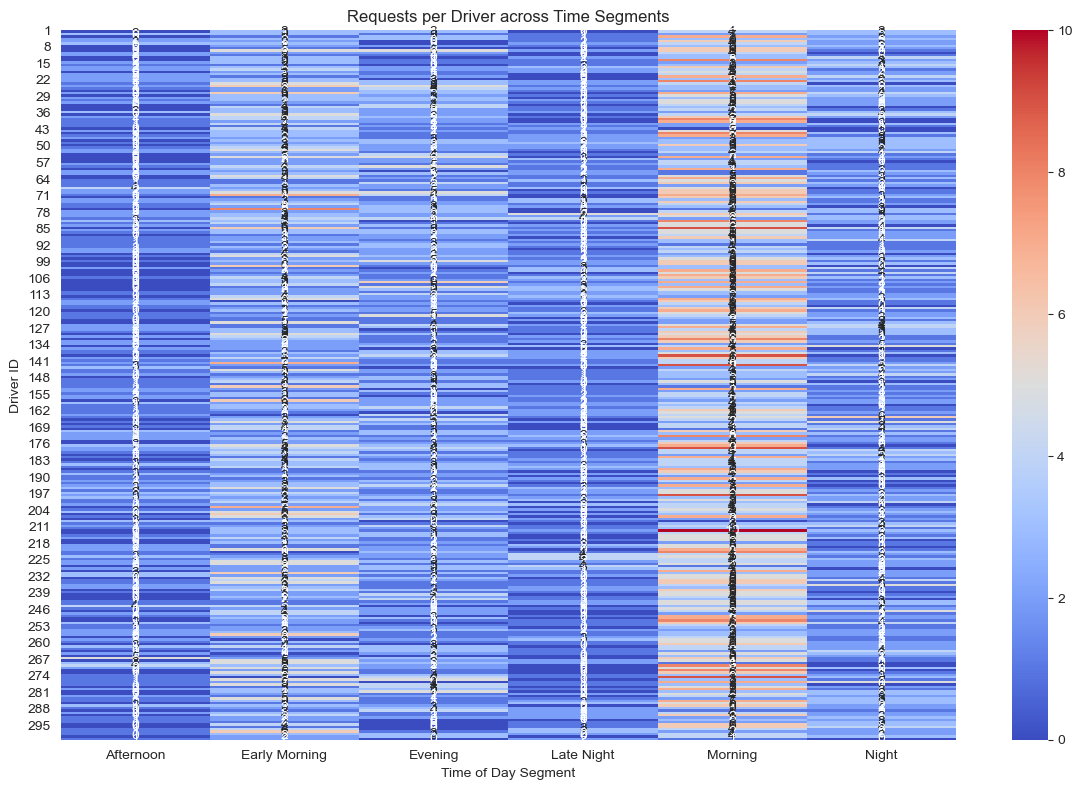

In [264]:
# Chart 8 - Requests per Driver across Time Segments

# Filter out driver id = 0
df_active = df[df['Driver id'] != 0]

# Group by driver and time segment, count requests
driver_time_stats = df_active.groupby(['Driver id', 'time_of_day_segment']).size().reset_index(name='request_count')
heatmap_data = driver_time_stats.pivot(index='Driver id', columns='time_of_day_segment', values='request_count').fillna(0)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm')  
plt.title('Requests per Driver across Time Segments')
plt.xlabel('Time of Day Segment')
plt.ylabel('Driver ID')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A heatmap has been visualised to understand the number of requests taken by individual drivers over the day. This gives a clear as in why drivers choose to work more in the morning times.

##### 2. What is/are the insight(s) found from the chart?

Clearly, morning times provide more rides for each driver. Some has up to 10 rides in the morning. Most of the drivers have below 5 rides in the night segments. This clearly shows the reason for the drivers choosing to work more in the morning and not in the late evenings and night times. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Without enough rides, it won't be fair to push the drivers more to the night rides. Maybe, the allocation needs to be done better. Most of the drivers work through out the day. A fair and beneficial allocation must be done to meet the demand.

#### Demand-Supply Gap by Time of Day Segment

C:\Users\USER\AppData\Local\Temp\ipykernel_3032\2150813653.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




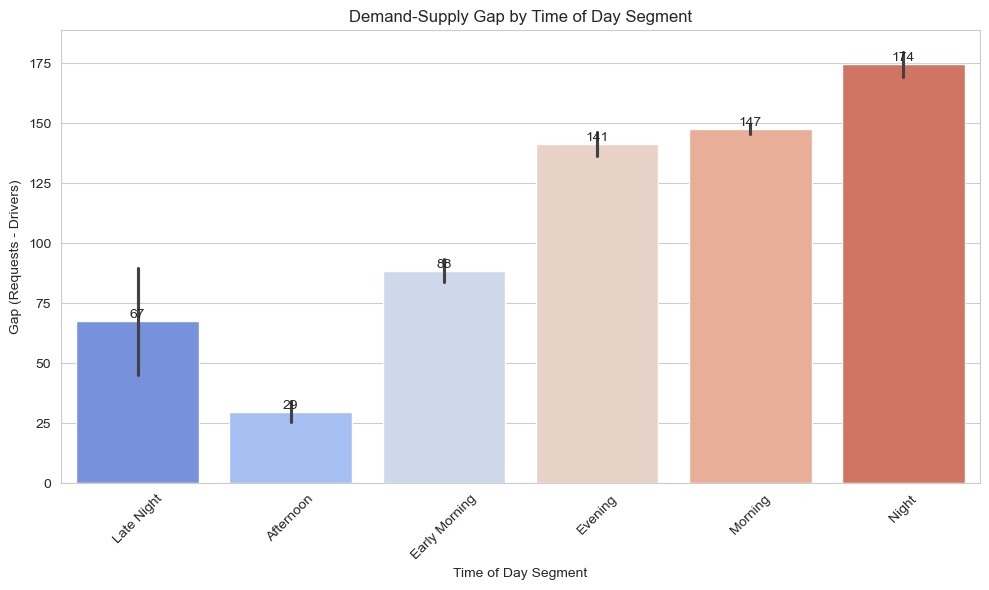

In [265]:
# Chart 9 - Demand-Supply Gap by Time of Day Segment

# Calculating the gap
gap_df = pd.merge(demand, supply, on='time_of_day_segment', how='left')
gap_df['gap'] = gap_df['request_count'] - gap_df['driver_count']


plt.figure(figsize=(10,6))
sns.barplot(x='time_of_day_segment', y='gap', data=gap_df, palette='coolwarm')

plt.title('Demand-Supply Gap by Time of Day Segment')
plt.xlabel('Time of Day Segment')
plt.ylabel('Gap (Requests - Drivers)')
plt.xticks(rotation=45)

# Add the number labels on top of bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The analysis on demand and supply has been completed. The following visualization helps to summarise the gap for the time segment. The gap was calculated by taking the difference of supply and demand. The lines above each bar in the chart are error bars, representing variability or uncertainty. In this context, they could indicate the range of variation in the gap data or the confidence interval.

##### 2. What is/are the insight(s) found from the chart?

Main insights are:

-Morning and night segments have the highest gaps, indicating significant unmet demand. 

-Early Morning and late-night show lower gaps, suggesting demand and supply are more balanced.

-Afternoon also has a relatively low gap.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focus must be morning and night segments as these show highest unmet demand. Driver shifts must be adjusted to cover peak times, taking into consideration the location demands as well.

#### Demand, Supply, and Gap by Time of Day Segment

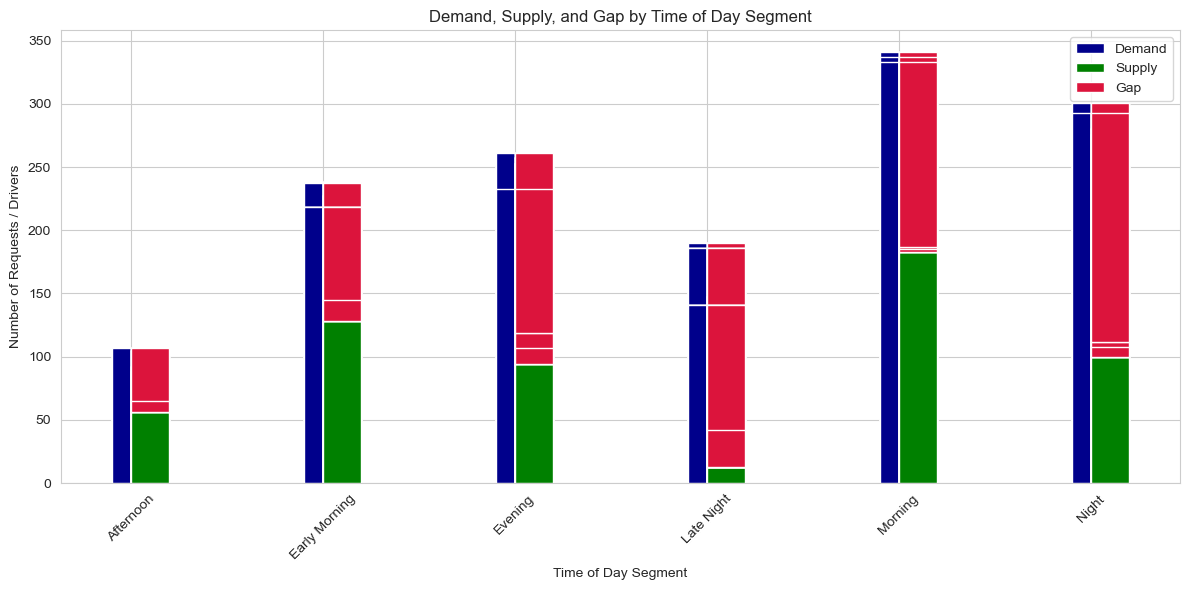

In [266]:
# Chart 10 - Demand, Supply, and Gap by Time of Day Segment

gap_df = gap_df.sort_values('time_of_day_segment')

# Set figure size
plt.figure(figsize=(12, 6))

# Plot demand
plt.bar(gap_df['time_of_day_segment'], gap_df['request_count'], width=0.2, label='Demand', color='darkblue', align='center')

# Plot supply
plt.bar(gap_df['time_of_day_segment'], gap_df['driver_count'], width=0.2, label='Supply', color='green', align='edge')

# Plot gap as a bar above supply
plt.bar(gap_df['time_of_day_segment'], gap_df['gap'], bottom=gap_df['driver_count'], width=0.2, label='Gap', color='crimson', align='edge')

# Add title and labels
plt.title('Demand, Supply, and Gap by Time of Day Segment')
plt.xlabel('Time of Day Segment')
plt.ylabel('Number of Requests / Drivers')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

A final graph was plotted to see the demand, supply and gap in one place for better comparison. 

##### 2. What is/are the insight(s) found from the chart?

The demand (blue) is consistently higher than supply (green), especially during Morning and Night. The gap (red) indicates unmet demand, which highlights periods where driver supply may need to be improved. The Morning and Night segments have the highest gaps, suggesting these are critical periods for driver deployment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

More focus should be on increasing driver availability during the times of High demand and low supply. Low gap periods may not need immediate actions. However, proper monitoring must be implemented to identify changes in future.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on your detailed analysis and visualizations, the following are the business solutions that directly address the identified supply-demand gaps:
 - Increase driver shifts during peak times (morning and night) to meet high demand, especially in high-gap locations.
 - Offer incentives, bonuses, or badges for drivers who work in low supply but high demand periods such as late-night and early mornings.
  - Focus on increasing driver availability in high-demand areas, such as airports and city hotspots. Use geo-analytics to identify congestion areas and deploy drivers strategically in real-time.
 - Offer flexible working hours, especially for drivers preferring nighttime shifts.
 - Introduce shift reviews periodically to match supply with demand effectively.
 - Implement predictive analytics to forecast demand trends hourly and daily to optimize driver allocation.
 - Encourage riders to use services during low-demand periods with discounts.
 - Use driver and user feedbacks to continually improve scheduling practices and identify bottlenecks.

By implementing these practices, a better supply for the demands, thereby reducing the gap can be achieved.


# **Conclusion**

The analysis provides a comprehensive analysis of Uber’s demand and supply dynamics, highlighting critical time segments that experience the highest unmet demand. Through detailed data preprocessing, exploratory data analysis, and visualizations, the key areas were identified where driver supply needs to be optimized to reduce gaps. The insights gained emphasize the importance of strategic driver scheduling, location-specific deployment, and incentivization during high-demand periods. Implementing these targeted interventions can enhance operational efficiency, improve customer satisfaction, and ensure a balanced supply-demand ecosystem.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***